In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
# Load the data into a DataFrame
data = pd.read_csv("C:/Users/dell/Desktop/OPS Free internship/traces_data.csv")
'''Here I modified the column names
As the column names was creating problem for extracting the columns for data analysis
a: Timestamp
b: traceID
c: spanID
d: parentSpanID
e: serviceName
f: Name
g: durationNano'''

'Here I modified the column names\nAs the column names was creating problem for extracting the columns for data analysis\na: Timestamp\nb: traceID\nc: spanID\nd: parentSpanID\ne: serviceName\nf: Name\ng: durationNano'

In [93]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())


First few rows of the DataFrame:
         a                                 b                 c  \
0  42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1  42:32.7  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2  42:33.9  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3  42:36.9  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4  42:39.9  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   

                  d                   e  \
0               NaN  featureflagservice   
1  0d87dcf5ea5aeaab  featureflagservice   
2               NaN      frontend-proxy   
3               NaN      frontend-proxy   
4               NaN      frontend-proxy   

                                            f       g  
0                                           /  887477  
1  featureflagservice.repo.query:featureflags  481634  
2                                     ingress  213000  
3                                     ingress  602000  
4                              

In [94]:
# Summary statistics of numerical columns here only durationNano
print("\nSummary statistics of numerical columns:")
print(data.describe())
#Here g stands for durationNano which is only one numerical column


Summary statistics of numerical columns:
                  g
count  1.836150e+05
mean   5.414918e+06
std    2.077879e+07
min    0.000000e+00
25%    3.357000e+05
50%    1.584906e+06
75%    6.832718e+06
max    4.999858e+09


In [95]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
a        0
b        0
c        0
d    41781
e        0
f        0
g        0
dtype: int64


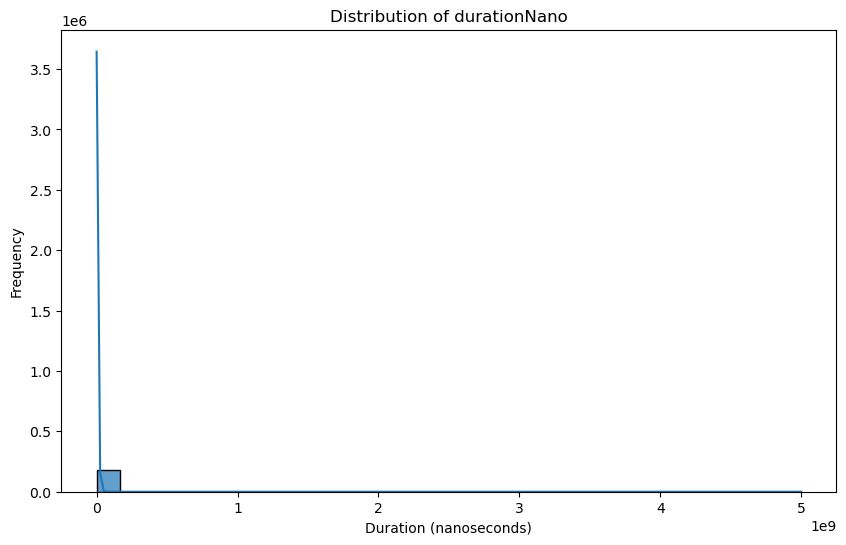

In [96]:
# Distribution of durationNano
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='g', bins=30,alpha= 0.7, kde=True)
plt.title("Distribution of durationNano")
plt.xlabel("Duration (nanoseconds)")
plt.ylabel("Frequency")
plt.show()
#The distribution of durationNano is strictly positively skewed 


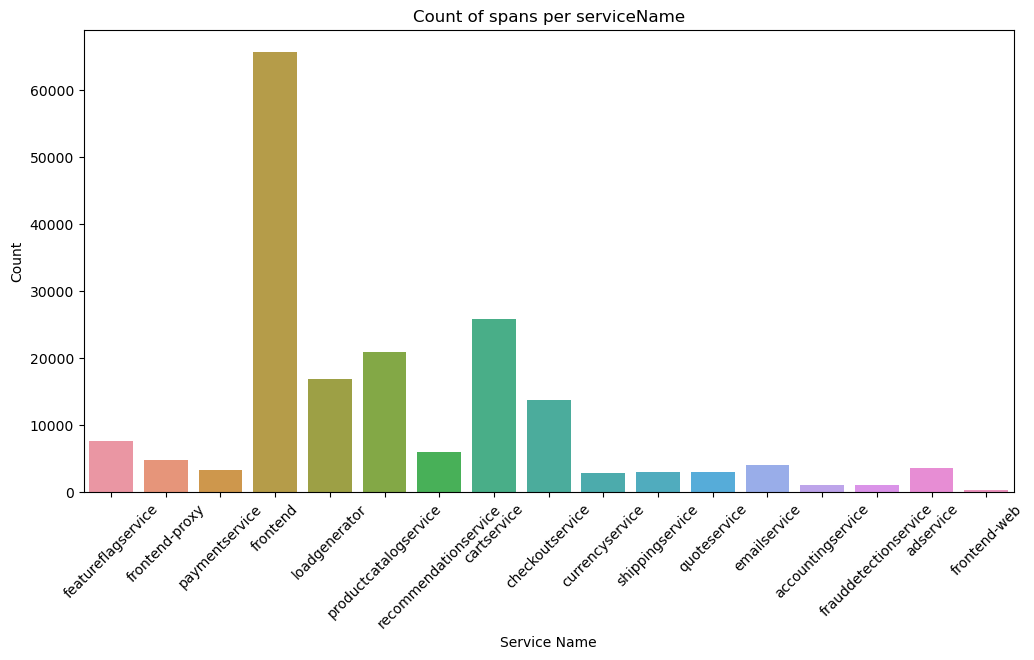

In [83]:
# Count of spans per serviceName
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='e')
plt.title("Count of spans per serviceName")
plt.xlabel("Service Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#This shows that total number of payment service is maximum among all services and frontend-web is least among all services

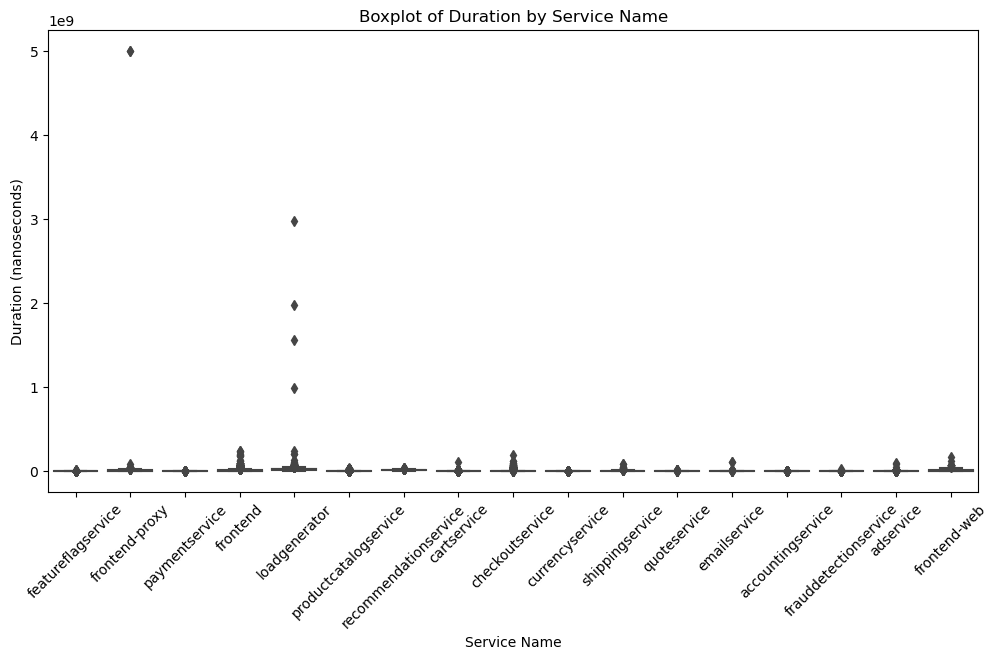

In [97]:
# Boxplot of Duration by Service Name
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='e', y='g')
plt.title("Boxplot of Duration by Service Name")
plt.xlabel("Service Name")
plt.ylabel("Duration (nanoseconds)")
plt.xticks(rotation=45)
plt.show()
#This shows that frontend-proxy has a outlier present and also frontend service has fur outliers present 

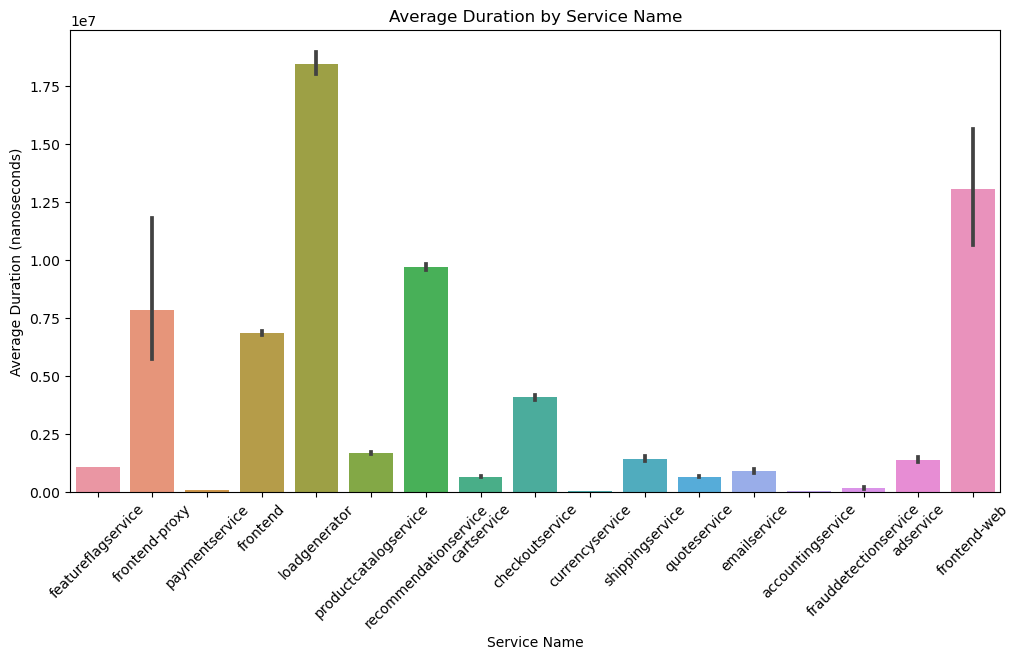

'This is an interesting plot as we have seen earlier that\nfrontend web services has lowest number of service but the duration nano is quite high\nand payment srvices had maximum number of counts as service provider but durationNAno is quite low for them\nfrontend services has maximum average duration time \nSo it can be stated that maximum service providers has lesser duration'

In [98]:
# Barplot of Average Duration by Service Name
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='e', y='g', estimator=np.mean)
plt.title("Average Duration by Service Name")
plt.xlabel("Service Name")
plt.ylabel("Average Duration (nanoseconds)")
plt.xticks(rotation=45)
plt.show()
'''This is an interesting plot as we have seen earlier that
frontend web services has lowest number of service but the duration nano is quite high
and payment srvices had maximum number of counts as service provider but durationNAno is quite low for them
frontend services has maximum average duration time 
So it can be stated that maximum service providers has lesser duration'''

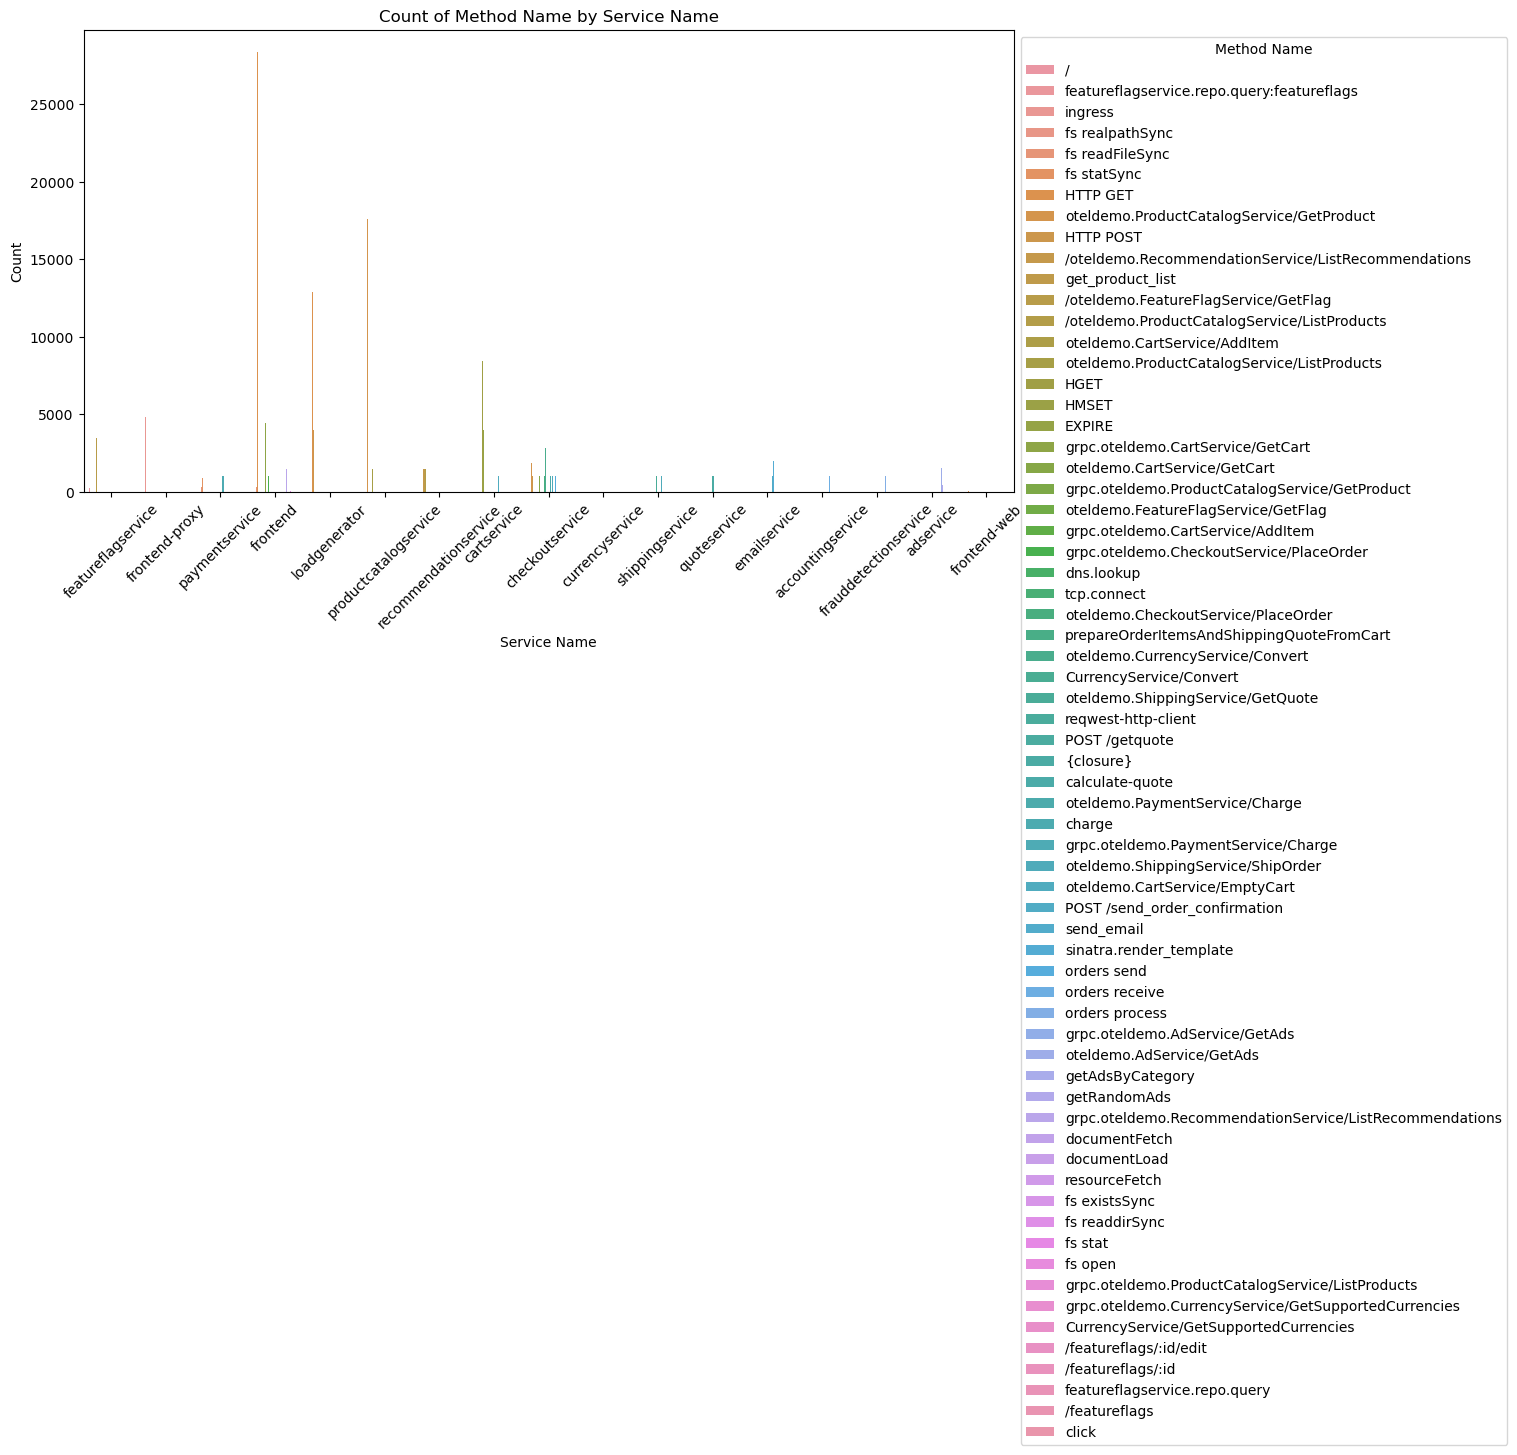

'It shows that payment services has used maximum number of method named fs statSync'

In [99]:
# Countplot of Method Name by Service Name
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='e', hue='f')
plt.title("Count of Method Name by Service Name")
plt.xlabel("Service Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Method Name', bbox_to_anchor=(1, 1))
plt.show()
'''It shows that payment services has used maximum number of method named fs statSync'''